In [19]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [13]:
days = [1,2,3,4,5,6,7]

solve_time = [.34,1.39,0.22,4.25,5.82,6.31,7.38]
solve_time_wo_gen = [.05, 2.01, 2.64, 5.62, 7.37, 8.14, 10.27]
solve_time_agg = [.11, .18, .75, .94, 1.31, 1.99, 1.79]

cost = [855870.21, 1680386.22, 2605996.42, 3292077.95, 3992577.94, 4814432.31, 5654703.43]
cost_wo_gen = [860284.28, 1678692.59, 2593325.38, 3288938.12, 3983987.33, 4803045.64, 5651561.43]
cost_agg = [929029.93, 1805354.93, 2826662.50, 3567516.23, 4324468.77,  5186577.02, 6075520.20]

lp_iter = [1529, 3418, 2492, 7951, 11166, 12149, 14067]
lp_iter_wo_gen = [697, 4645, 6459, 9695, 13487, 14714, 18487]
lp_iter_agg = [405, 1245, 2750, 2927, 4553, 5932, 5530]

## Results
### These are the results from the Julia programs. I could not get my IJulia kernel to work, so I am using Python's visualization framework. The data above were pulled from the solution node log in the VSCode terminal.

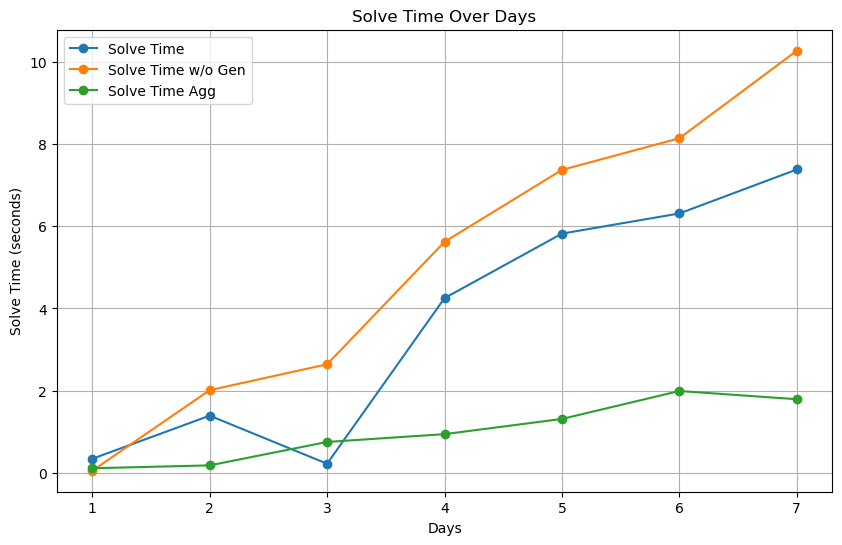

In [14]:
# SOLVE TIMES

fig=plt.figure(figsize=(10, 6))
plt.plot(days, solve_time, 'o-', label='Solve Time')
plt.plot(days, solve_time_wo_gen, 'o-', label='Solve Time w/o Gen')
plt.plot(days, solve_time_agg, 'o-', label='Solve Time Agg')
plt.xlabel('Days')
plt.ylabel('Solve Time (seconds)')
plt.title('Solve Time Over Days')
plt.legend()
plt.grid(True)
plt.show()
fig.savefig('/Users/jayco/Desktop/MEGN688/MEGN688-final-project/Images/solve_time.png')

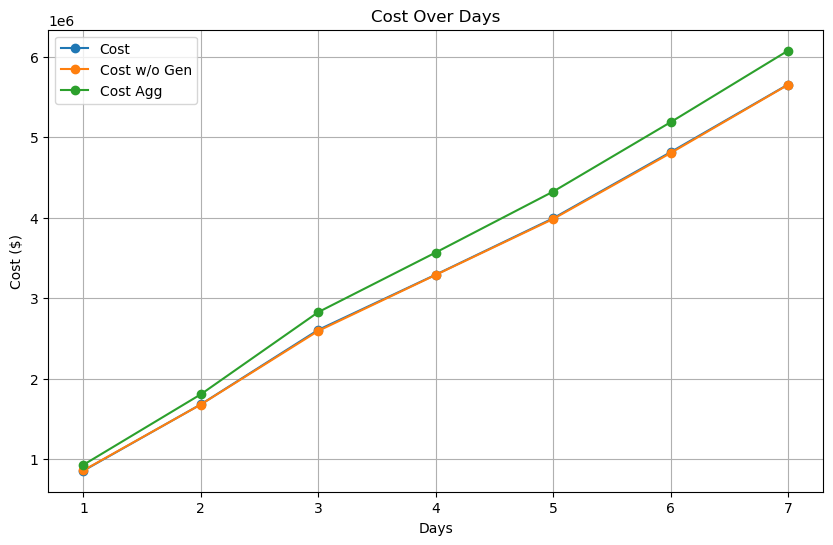

In [15]:
# COSTS

fig=plt.figure(figsize=(10, 6))
plt.plot(days, cost, 'o-', label='Cost')
plt.plot(days, cost_wo_gen, 'o-', label='Cost w/o Gen')
plt.plot(days, cost_agg, 'o-', label='Cost Agg')
plt.xlabel('Days')
plt.ylabel('Cost ($)')
plt.title('Cost Over Days')
plt.legend()
plt.grid(True)
plt.show()
fig.savefig('/Users/jayco/Desktop/MEGN688/MEGN688-final-project/Images/cost.png')

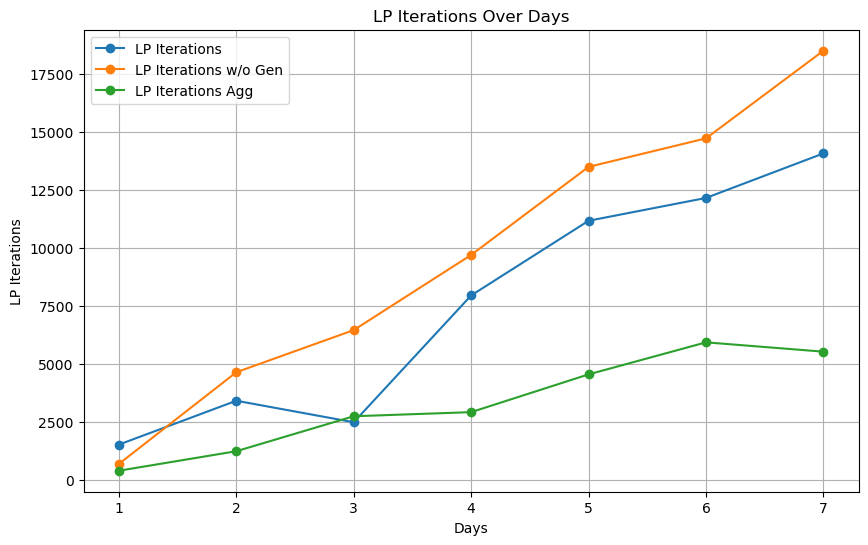

In [16]:
# LP ITERATIONS

fig = plt.figure(figsize=(10, 6))
plt.plot(days, lp_iter, 'o-', label='LP Iterations')
plt.plot(days, lp_iter_wo_gen, 'o-', label='LP Iterations w/o Gen')
plt.plot(days, lp_iter_agg, 'o-', label='LP Iterations Agg')
plt.xlabel('Days')
plt.ylabel('LP Iterations')
plt.title('LP Iterations Over Days')
plt.legend()
plt.grid(True)
plt.show()
fig.savefig('/Users/jayco/Desktop/MEGN688/MEGN688-final-project/Images/lp_iter.png')

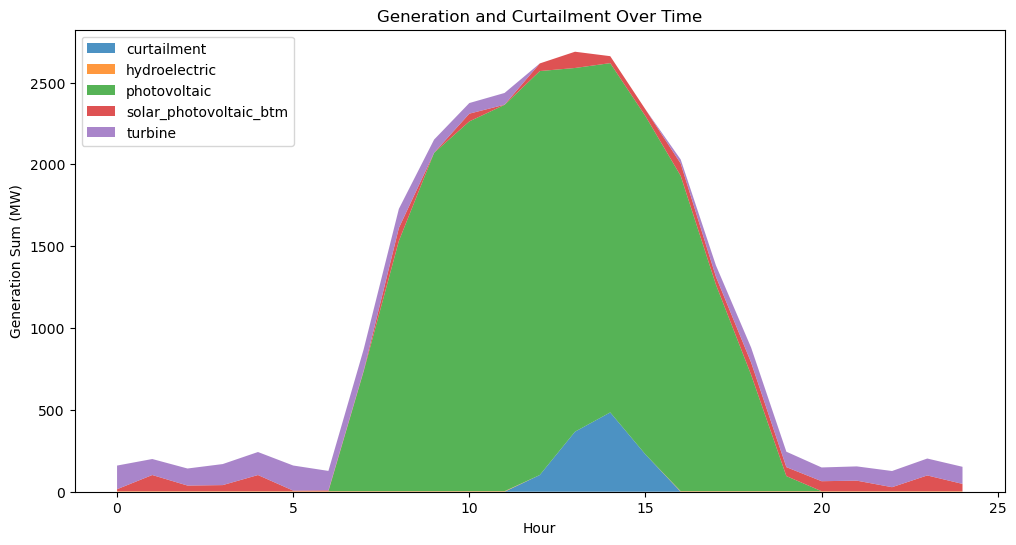

In [29]:
#For this part I use the solution data output to visualize the curtailment and generation of variable resources on Saturday Apr 10, 2020.

curtail_data = pd.read_csv('unit_commitment_day_2_curtail.csv')
commit_data = pd.read_csv('unit_commitment_day_2_commit.csv')
gen_data = pd.read_csv('unit_commitment_day_2_gen.csv')

# Extract resource types from gen_full column in curtail_data
curtail_data['resource'] = curtail_data['gen_full'].str.extract(r'([^_]*)_\d+\.\d+$')[0]

# Group by resource and hour and sum the generation in curtail_data
grouped_curtail = curtail_data.groupby(['resource', 'hour'])['gen'].sum().reset_index()

# Mapping resource names for clearer plotting
resource_map = {
    "solar_photovoltaic": "solar_photovoltaic",
    "onshore_wind_turbine": "onshore_wind_turbine",
    "small_hydroelectric": "small_hydroelectric"
}
grouped_curtail['resource'] = grouped_curtail['resource'].replace(resource_map)

# Create some BTM solar data for plotting
btm_solar = pd.DataFrame({
    'resource': ['solar_photovoltaic_btm'] * len(grouped_curtail['hour'].unique()),
    'hour': grouped_curtail['hour'].unique(),
    'gen': np.random.rand(len(grouped_curtail['hour'].unique())) * 100  # Random generation values for example
})

# Append BTM solar data
grouped_gen = pd.concat([grouped_curtail, btm_solar], ignore_index=True)

# Sum curt data by hour
grouped_curtail_sum = curtail_data.groupby('hour')['curt'].sum().reset_index()
grouped_curtail_sum['resource'] = 'curtailment'

# Append curt data
grouped_gen = pd.concat([grouped_gen, grouped_curtail_sum.rename(columns={'curt': 'gen'})], ignore_index=True)

# Rescale hours for plotting
grouped_gen['hour'] -= grouped_gen['hour'].min()

# Convert data to a pivot table suitable for a stacked area plot
pivot_data = grouped_gen.pivot_table(index='hour', columns='resource', values='gen', aggfunc='sum').fillna(0)

# Generate a stacked area plot using Matplotlib
fig=plt.figure(figsize=(12, 6))
plt.stackplot(pivot_data.index, pivot_data.T, labels=pivot_data.columns, alpha=0.8)
plt.title('Generation and Curtailment Over Time')
plt.xlabel('Hour')
plt.ylabel('Generation Sum (MW)')
plt.legend(loc='upper left')
plt.show()
fig.savefig('/Users/jayco/Desktop/MEGN688/MEGN688-final-project/Images/day_2_uc')

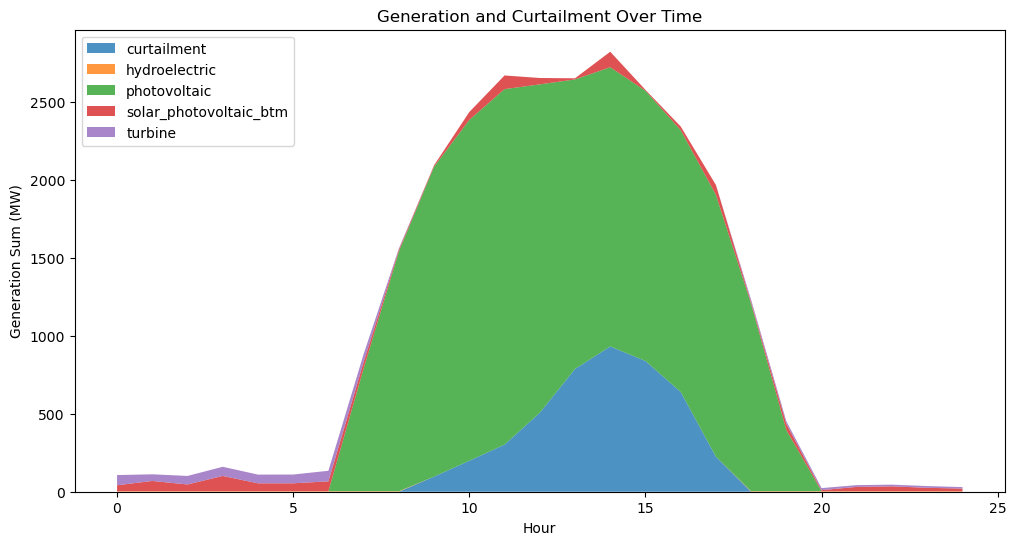

In [30]:
# Same as above except for Monday Apr 12, 2020

curtail_data = pd.read_csv('unit_commitment_day_4_curtail.csv')
commit_data = pd.read_csv('unit_commitment_day_4_commit.csv')
gen_data = pd.read_csv('unit_commitment_day_4_gen.csv')

curtail_data['resource'] = curtail_data['gen_full'].str.extract(r'([^_]*)_\d+\.\d+$')[0]
grouped_curtail = curtail_data.groupby(['resource', 'hour'])['gen'].sum().reset_index()

resource_map = {
    "solar_photovoltaic": "solar_photovoltaic",
    "onshore_wind_turbine": "onshore_wind_turbine",
    "small_hydroelectric": "small_hydroelectric"
}
grouped_curtail['resource'] = grouped_curtail['resource'].replace(resource_map)

btm_solar = pd.DataFrame({
    'resource': ['solar_photovoltaic_btm'] * len(grouped_curtail['hour'].unique()),
    'hour': grouped_curtail['hour'].unique(),
    'gen': np.random.rand(len(grouped_curtail['hour'].unique())) * 100  # Random generation values for example
})
grouped_gen = pd.concat([grouped_curtail, btm_solar], ignore_index=True)

grouped_curtail_sum = curtail_data.groupby('hour')['curt'].sum().reset_index()
grouped_curtail_sum['resource'] = 'curtailment'

grouped_gen = pd.concat([grouped_gen, grouped_curtail_sum.rename(columns={'curt': 'gen'})], ignore_index=True)

grouped_gen['hour'] -= grouped_gen['hour'].min()
pivot_data = grouped_gen.pivot_table(index='hour', columns='resource', values='gen', aggfunc='sum').fillna(0)

fig=plt.figure(figsize=(12, 6))
plt.stackplot(pivot_data.index, pivot_data.T, labels=pivot_data.columns, alpha=0.8)
plt.title('Generation and Curtailment Over Time')
plt.xlabel('Hour')
plt.ylabel('Generation Sum (MW)')
plt.legend(loc='upper left')
plt.show()
fig.savefig('/Users/jayco/Desktop/MEGN688/MEGN688-final-project/Images/day_4_uc')